DATA ANALYST / SCIENTIST ENTRY TASK

Taking the following dataset:
Scotch Whiskies Data
Paper: Lapointe, F.-J. & P. Legendre. 1994. A classification of pure malt Scotch whiskies. Applied Statistics 43: 237-257
http://adn.biol.umontreal.ca/~numericalecology/data/scotch.html
(direct link: adn.biol.umontreal.ca/~numericalecology/labo/Scotch/ScotchData.zip)

Please provide meaningful insights, e.g.:
-	What interesting information user can find in the dataset?
-	Choose whisky name and find other whisky(-ies) which you might like as well; Please provide reasoning of your steps
-	How chosen whisky(-ies) can be perceived vs. other types?
-	What factors impact results the most?

Requirements:
-	solution must contain comments (e.g. choice of model(s), assumptions, corrections, conclusions etc.)
-	solution written in python (especially Jupyter Notebook) 
-	solution with commits history on the Github
-	solution (if accepted) has to be presented during the following interview session - Q&A part after presentation


In [210]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

In [184]:
!pip install plotly

You should consider upgrading via the 'c:\python\python37\python.exe -m pip install --upgrade pip' command.


In [381]:
df = pd.read_csv('data/scotch.csv', error_bad_lines=False, delimiter=';')

In [382]:
df.head(5)

,NAME,color wyne,color yellow,color v.pale,color pale,color p.gold,color gold,color o.gold,color f.gold,color bronze,...,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
0,Aberfeldy,0,1,0,0,0,0,0,0,0,...,MIDLAND,0,1,0,0,0,0,0,0,0
1,Aberlour,0,0,0,0,0,0,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0
2,Ardberg,0,0,0,0,0,0,0,0,0,...,SOUTH,1,0,0,0,0,0,0,0,0
3,Ardmore,0,0,0,0,1,0,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0
4,Auchentoshan,0,0,0,0,1,0,0,0,0,...,WEST,0,0,0,0,0,0,1,0,0


In [383]:
df.columns

Index(['NAME', 'color wyne', 'color yellow', 'color v.pale', 'color pale',
       'color p.gold', 'color gold', 'color o.gold', 'color f.gold',
       'color bronze', 'color p.amber', 'color amber', 'color f.amber',
       'color red', 'color sherry', 'NOSE AROMA', 'NOSE PEAT', 'NOSE SWEET',
       'NOSE LIGHT', 'NOSE FRESH', 'NOSE DRY', 'NOSE FRUIT', 'NOSE GRASS',
       'NOSE SEA', 'NOSE SHERRY', 'NOSE SPICY', 'NOSE RICH', 'BODY soft',
       'BODY med', 'BODY full', 'BODY round', 'BODY smooth', 'BODY light',
       'BODY firm', 'BODY oily', 'PAL full', 'PAL dry', 'PAL sherry',
       'PAL big', 'PAL light', 'PAL smooth', 'PAL clean', 'PAL fruit',
       'PAL grass', 'PAL smoke', 'PAL sweet', 'PAL spice', 'PAL oil',
       'PAL salt', 'PAL arome', 'FIN full', 'FIN dry', 'FIN warm', 'FIN big',
       'FIN light', 'FIN smooth', 'FIN clean', 'FIN fruit', 'FIN grass',
       'FIN smoke', 'FIN sweet', 'FIN spice', 'FIN oil', 'FIN salt',
       'FIN arome', 'FIN ling', 'FIN long', 'FIN ver

In [384]:
df = df.drop(['DISTRICT', 'REGION'], axis=1)

In [385]:
df.columns = [x.lower().replace(' ', '_') for x in df.columns]
df.rename(columns={'name': 'distillerie', '%': 'score_2', 'north_': 'north'}, inplace=True)

In [386]:
df.columns

Index(['distillerie', 'color_wyne', 'color_yellow', 'color_v.pale',
       'color_pale', 'color_p.gold', 'color_gold', 'color_o.gold',
       'color_f.gold', 'color_bronze', 'color_p.amber', 'color_amber',
       'color_f.amber', 'color_red', 'color_sherry', 'nose_aroma', 'nose_peat',
       'nose_sweet', 'nose_light', 'nose_fresh', 'nose_dry', 'nose_fruit',
       'nose_grass', 'nose_sea', 'nose_sherry', 'nose_spicy', 'nose_rich',
       'body_soft', 'body_med', 'body_full', 'body_round', 'body_smooth',
       'body_light', 'body_firm', 'body_oily', 'pal_full', 'pal_dry',
       'pal_sherry', 'pal_big', 'pal_light', 'pal_smooth', 'pal_clean',
       'pal_fruit', 'pal_grass', 'pal_smoke', 'pal_sweet', 'pal_spice',
       'pal_oil', 'pal_salt', 'pal_arome', 'fin_full', 'fin_dry', 'fin_warm',
       'fin_big', 'fin_light', 'fin_smooth', 'fin_clean', 'fin_fruit',
       'fin_grass', 'fin_smoke', 'fin_sweet', 'fin_spice', 'fin_oil',
       'fin_salt', 'fin_arome', 'fin_ling', 'fin_long', '

In [387]:
for column_name, series in df.isna().items():
    print(f"In {column_name} series found:\t{sum(series)} NaN values")
    if sum(series)>0:
        series = series.fillna(series.mean())

In distillerie series found:	0 NaN values
In color_wyne series found:	0 NaN values
In color_yellow series found:	0 NaN values
In color_v.pale series found:	0 NaN values
In color_pale series found:	0 NaN values
In color_p.gold series found:	0 NaN values
In color_gold series found:	0 NaN values
In color_o.gold series found:	0 NaN values
In color_f.gold series found:	0 NaN values
In color_bronze series found:	0 NaN values
In color_p.amber series found:	0 NaN values
In color_amber series found:	0 NaN values
In color_f.amber series found:	0 NaN values
In color_red series found:	0 NaN values
In color_sherry series found:	0 NaN values
In nose_aroma series found:	0 NaN values
In nose_peat series found:	0 NaN values
In nose_sweet series found:	0 NaN values
In nose_light series found:	0 NaN values
In nose_fresh series found:	0 NaN values
In nose_dry series found:	0 NaN values
In nose_fruit series found:	0 NaN values
In nose_grass series found:	0 NaN values
In nose_sea series found:	0 NaN values


In [388]:
color_labels = [x for x in df.columns if 'color' in x]
nose_labels = [x for x in df.columns if 'nose' in x]
body_labels = [x for x in df.columns if 'body' in x]
pal_labels = [x for x in df.columns if 'pal' in x]
fin_labels = [x for x in df.columns if 'fin' in x]
scores = ['age', 'dist', 'score', 'score_2']
non_loc_labels = color_labels + nose_labels + body_labels + pal_labels + fin_labels + scores + ['distillerie']
loc_labels = list(set(df.columns) - set(non_loc_labels))

loc_labels

['campbell',
 'islay',
 'islands',
 'north',
 'east',
 'lowland',
 'west',
 'midland',
 'spey']

In [389]:
summary[color_labels].values[0]

array([ 8,  2,  2,  4, 10, 21,  2, 27,  5,  4, 15,  4,  4,  1],
      dtype=int64)

In [390]:
labels_to_plot = [color_labels, nose_labels, body_labels, pal_labels, fin_labels, loc_labels]; labels_to_plot

[['color_wyne',
  'color_yellow',
  'color_v.pale',
  'color_pale',
  'color_p.gold',
  'color_gold',
  'color_o.gold',
  'color_f.gold',
  'color_bronze',
  'color_p.amber',
  'color_amber',
  'color_f.amber',
  'color_red',
  'color_sherry'],
 ['nose_aroma',
  'nose_peat',
  'nose_sweet',
  'nose_light',
  'nose_fresh',
  'nose_dry',
  'nose_fruit',
  'nose_grass',
  'nose_sea',
  'nose_sherry',
  'nose_spicy',
  'nose_rich'],
 ['body_soft',
  'body_med',
  'body_full',
  'body_round',
  'body_smooth',
  'body_light',
  'body_firm',
  'body_oily'],
 ['color_v.pale',
  'color_pale',
  'pal_full',
  'pal_dry',
  'pal_sherry',
  'pal_big',
  'pal_light',
  'pal_smooth',
  'pal_clean',
  'pal_fruit',
  'pal_grass',
  'pal_smoke',
  'pal_sweet',
  'pal_spice',
  'pal_oil',
  'pal_salt',
  'pal_arome'],
 ['fin_full',
  'fin_dry',
  'fin_warm',
  'fin_big',
  'fin_light',
  'fin_smooth',
  'fin_clean',
  'fin_fruit',
  'fin_grass',
  'fin_smoke',
  'fin_sweet',
  'fin_spice',
  'fin_oil',
 

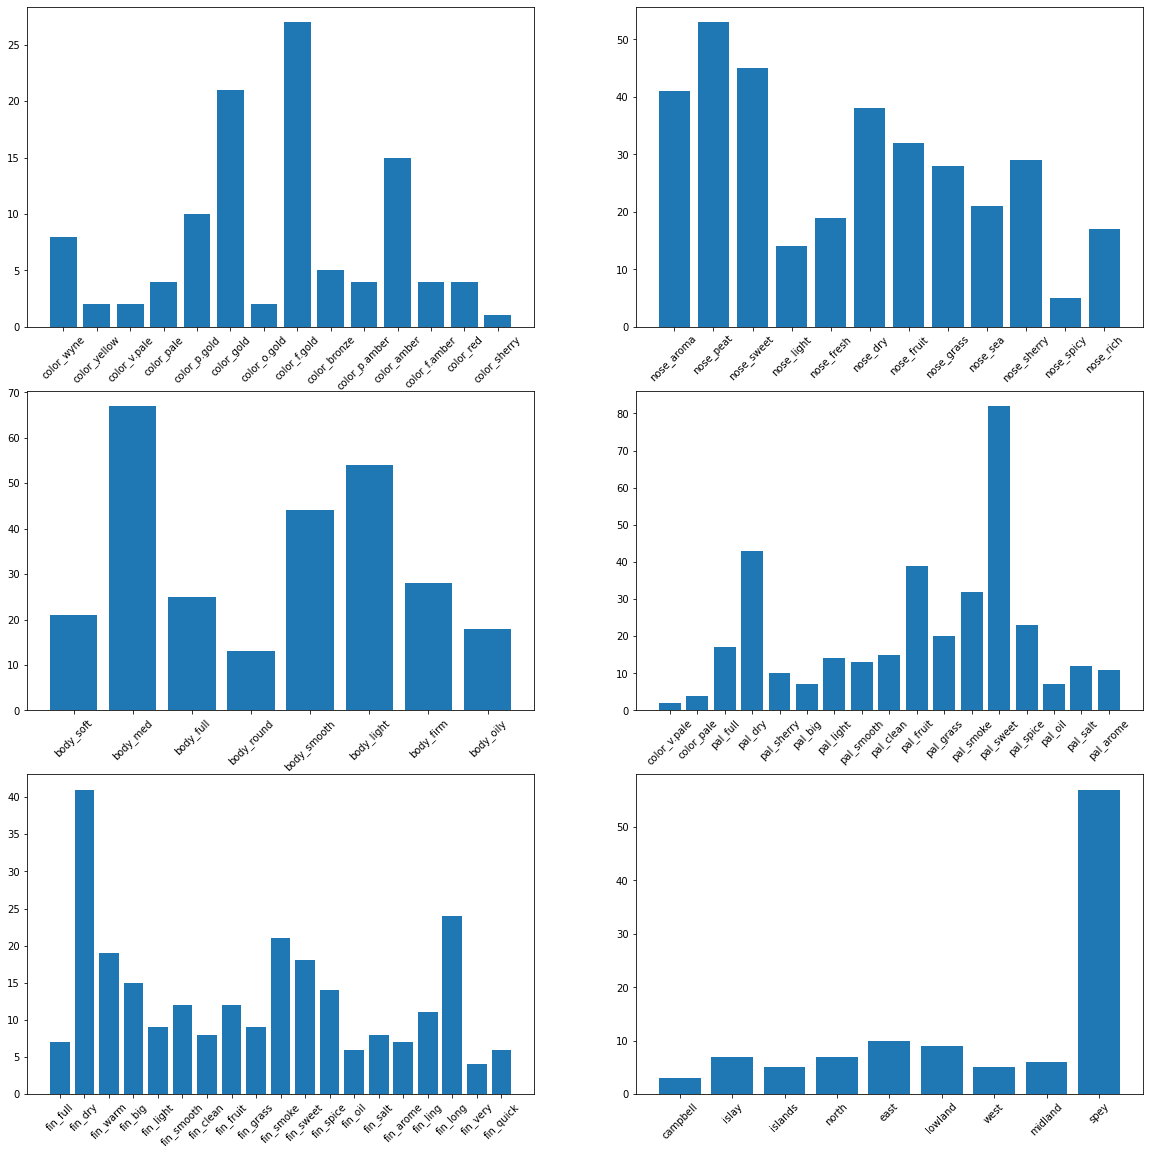

In [391]:
f, ax = plt.subplots(3, 2, figsize=[20, 20])
i=0

for x in range(0, 3):
    for y in range(0, 2):
#        ax[x, y].set_title(labels_to_plot())
        ax[x, y].tick_params(axis='x', labelrotation=45)
        ax[x, y].bar(labels_to_plot[i], summary[labels_to_plot[i]].values[0])
        i += 1

## Read coordinates data and merge it to the main data

In [392]:
coordinates = pd.read_table('data\DISTCOOR.TXT'); coordinates.head(5)

,Distillerie,West,North
0,Aberfeldy 3.875 56.62,NaN,NaN
1,Aberlour 3.22 57.46,NaN,NaN
2,Ardberg 6.08 55.64,NaN,NaN
3,Ardmore 2.67 57.32,NaN,NaN
4,Auchentoshan 4.39 55.91,NaN,NaN


In [393]:
import re

In [394]:
re.split('\s+', coordinates['Distillerie'][0])

['Aberfeldy', '3.875', '56.62']

In [395]:
coordinates['cor_west'] = coordinates['Distillerie'].apply(lambda x: re.split('\s+', x)[1])
coordinates['cor_north'] = coordinates['Distillerie'].apply(lambda x: re.split('\s+', x)[2])
coordinates['distillerie'] = coordinates['Distillerie'].apply(lambda x: re.split('\s+', x)[0])
coordinates = coordinates.drop(['Distillerie', 'North', 'West'], axis=1)

In [396]:
coordinates

,cor_west,cor_north,distillerie
0,3.875,56.62,Aberfeldy
1,3.22,57.46,Aberlour
2,6.08,55.64,Ardberg
3,2.67,57.32,Ardmore
4,4.39,55.91,Auchentoshan
...,...,...,...
104,6.08,56.61,Tobermory
105,3.99,57.33,Tomatin
106,3.38,57.25,Tomintoul
107,3.41,57.38,Tormore


In [397]:
df = df.merge(coordinates, on='distillerie'); df.head(5)

,distillerie,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,...,midland,spey,east,west,north,lowland,campbell,islands,cor_west,cor_north
0,Aberfeldy,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,3.875,56.62
1,Aberlour,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,3.22,57.46
2,Ardberg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.08,55.64
3,Ardmore,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2.67,57.32
4,Auchentoshan,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,4.39,55.91
